In [2]:
import numpy as np
import pandas as pd
import scipy.stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
data = pd.read_csv('./data/provData/x_train.csv').set_index('Provider')
#data_test = pd.read_csv('./data/provData/x_test_inout.csv').set_index('Provider')

In [148]:
data.drop(columns = ['Unnamed: 0','Unnamed: 0.1'], inplace=True)

In [149]:
#x_train = x_train.drop(columns = 'PotentialFraud')
y = data['PotentialFraud']
X = data.drop(columns = ['PotentialFraud','Set_Range'])

Get quick look at score for model using whole feature set

In [38]:
print("The accuracy of logistic regression is: " + str(logit.score(X, y)))

The accuracy of logistic regression is: 0.9216266173752311


Not very good since null model would have an accuracy of 91%

## Metrics

### Recall
Recall (or sensitivity or true positive rate) is the fraction of observations having a true class of 1 (potentially fraudulent) that are being correctly classified as such. Recall is exactly how many of the fradulent providers we are actually classifying as fraudulent.

If we have a problem like cancer detection, we would ideally want our system to have very high recall, potentially at the expense of false postives or accuracy in general.

### F1 Score
F1 score is the harmonic mean of recall and precision, and it can be thought of as a balance of the two. While accuracy also serves this purpose, it can be quite misleading if classes are heavily imbalanced. In our case, only 9% of providers have been labeled as fraudulent and we assume the test set follows the same distribution. 

For instance, suppose we have a population of 1000 providers and 100 of them are fraudulent. We have a classfication system that produces the following results:

- 40 True Positive (correctly identified fraud)
- 10 False Positives (incorrectly mistook non-fraud for fraud)
- 20 False Negative (failed to identify fraud)
- 930 True Negatives (correctly identified non-fraud)

In this example, we have 93.0% accuracy while the F1 score is 72.7% (and 80% precision, 67% recall), which seems to be a more useful overall indicator of performance in this case.

### ROC Curve and AUC
The receiver operating characteristic curve (or ROC curve) is another tool for evaluating the classfication performance of different models. For any given model, the ROC curve plots the tradoff between the false positive rate on the x-axis against the true positive rate (aka Precision) for different choices of thresholds for a binary classifier. In one extreme case, if the classification threshold is 0, then all instances (for non-perfect models) will be classified as 0, leading to a false positive rate of 0, but also a true postive rate of 0. In the other extreme case, a threshold of 1 leads to a true positive rate/recall of 1 but also a false postive rate of 1. 

In terms of evaluating classification performance, an ROC curve which is closer to the (FPR = 0, TPR = 1) point compared to another indicates that the former model strictly dominates the latter. Beyond just the curve, one summary measure is simply the AUC or (A)rea (U)nder the ROC (C)urve. A completely random model will produce an AUC of 0.5 while a perfect model will have an AUC of 1.

In [39]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score

def logitMetrics(x,y, model):
    logit_tr_acc = model.score(x, y)
    logit_tr_pr, logit_tr_re, logit_tr_f1, _ = precision_recall_fscore_support(y, logit.predict(x))

    print(" Logit Train Accuracy : %1.3f" % (logit_tr_acc))
    print(" Logit Train Precision: %1.3f (no fraud) and %1.3f (fraud)" % (logit_tr_pr[0], logit_tr_pr[1]))
    print(" Logit Train Recall   : %1.3f (no fraud) and %1.3f (fraud)" % (logit_tr_re[0], logit_tr_re[1]))
    print(" Logit Train F1 Score : %1.3f (no fraud) and %1.3f (fraud)" % (logit_tr_f1[0], logit_tr_f1[1]))
    
    y_probs_logit = pd.DataFrame(model.predict_proba(x))[1]
    fpr, tpr, thresholds = roc_curve(y, y_probs_logit)
    auc = roc_auc_score(y, y_probs_logit)  # Computes auc
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
            label='ROC logit (area = %0.2f)' % auc)

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0, 1.02])
    plt.ylim([0, 1.02])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

 Logit Train Accuracy : 0.922
 Logit Train Precision: 0.945 (no fraud) and 0.610 (fraud)
 Logit Train Recall   : 0.970 (no fraud) and 0.451 (fraud)
 Logit Train F1 Score : 0.957 (no fraud) and 0.518 (fraud)


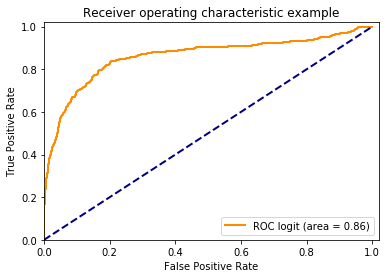

In [40]:
logitMetrics(X,y,logit)

In [1]:
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
import sklearn.model_selection as ms

In [2]:
ms_10s = ms.StratifiedKFold(n_splits=10)


In [19]:
x_train, x_test, y_train, y_test = ms.train_test_split(X,y, 
                                                       test_size=1.0/3, random_state=0)

print('Original: {}, {}'.format(X.shape, y.shape))
print('Training: {}, {}'.format(x_train.shape, y_train.shape))
print('Test:     {}, {}'.format(x_test.shape, y_test.shape))

Original: (5410, 63), (5410,)
Training: (3606, 63), (3606,)
Test:     (1804, 63), (1804,)


In [29]:
logit = linear_model.LogisticRegression(solver='liblinear', C=1e4)
scores = ms.cross_val_score(estimator=logit, X=X, y=y, cv=10)

print('Scores: {}'.format(scores))
print('Score mean: {}'.format(scores.mean()))
print('Score std deviation: {}'.format(scores.std()))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iteratio

Scores: [0.95563771 0.94085028 0.9297597  0.93160813 0.92051756 0.92791128
 0.92421442 0.93715342 0.93345656 0.93345656]
Score mean: 0.933456561922366
Score std deviation: 0.009279039111283645


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [23]:
print('Training Error: {}'.format(np.round(np.array(train_error), 4))) # training error
print('Test Error: {}'.format(np.round(np.array(test_error), 4))) # test error

## calculate the mean of the test error
print('Test Error Mean: {:6f}'.format(np.mean(test_error)))

## calculate the standard deviation of the test errors
print('Test Error SD: {:6f}'.format(np.std(test_error)))

Training Error: [0.0752 0.0752 0.0752 0.0752 0.0752]
Test Error: [0.0793 0.0793 0.0793 0.0793 0.0793]
Test Error Mean: 0.079268
Test Error SD: 0.000000


 Logit Train Accuracy : 0.945
 Logit Train Precision: 0.945 (no fraud) and 0.610 (fraud)
 Logit Train Recall   : 0.970 (no fraud) and 0.451 (fraud)
 Logit Train F1 Score : 0.957 (no fraud) and 0.518 (fraud)


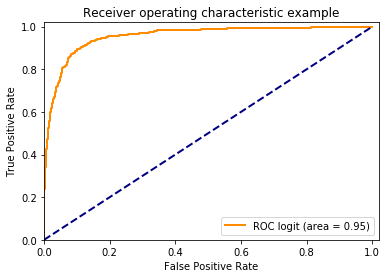

In [73]:
logitcv_recall = linear_model.LogisticRegressionCV(penalty='l1', 
                                            scoring = 'recall_weighted',
                                            solver = 'liblinear').fit(X,y)
logitMetrics(X,y,logitcv_recall)

## SMOTE

Synthetic Minority Oversampling Technique

### Pros
- problem with imbalanced classification is there are too few examples of the minority class for a model to effectively learn the decision boundary.
- we can oversample the minority to counterbalance this. 
    - we can duplicate examples from minority class prior to fitting the model
    - this balances the class distribution but does not provide any additional information to the model. 
    

### Cons
- Synthetic examples created without considering majority class - resulting in ambiguous examples if there is strong overlap for the classes. 
    - In our case, at least for small providers, theres lots of overlap in the featurespace wrt number of patients, number of claims, etc. 
### Concerns:
- Given that our target is not actual fraud but a potential fraud do we want confidence intervals / prediction intervals?
- would an oversampling technique such as this diminish that?


In [74]:
import imblearn
print(imblearn.__version__)

0.7.0


In [77]:
from sklearn.datasets import make_classification

In [78]:
X,y = make_classification(n_samples=10000, n_features=2, 
                          n_redundant=0, n_clusters_per_class=1, 
                          weights=[0.99], flip_y=0, random_state=1)

In [81]:
from collections import Counter
counter = Counter(y)

In [84]:
counter

Counter({0: 9900, 1: 100})

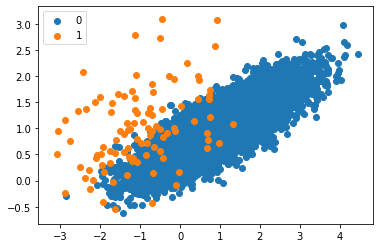

In [86]:
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix,0], X[row_ix,1], label=str(label))
plt.legend()
plt.show()

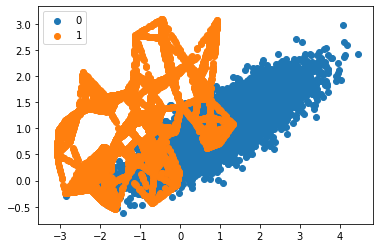

In [88]:

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X,y)

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix,0], X[row_ix,1], label=str(label))
plt.legend()
plt.show()



In [89]:
Counter(y)

Counter({0: 9900, 1: 9900})

Shows creation of more observations of the minority class along the lines in feature space of the minority class

Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})


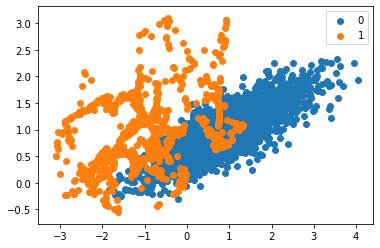

In [91]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

X,y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                          n_clusters_per_class=1, weights=[0.99], 
                          flip_y=0, random_state=1)

counter = Counter(y)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over),('u', under)]
pipeline = Pipeline(steps = steps)
# transform the dataset
X,y = pipeline.fit_resample(X,y)
# summarize new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y==label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix,1], label=str(label))
plt.legend()
plt.show()



## Applying SMOTE to Logistic Regression

In [96]:

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, 
                           n_redundant=0,n_clusters_per_class=1, 
                           weights=[0.99], flip_y=0, random_state=1)

# define model: Unpenalized Logistic Regression
model = linear_model.LogisticRegression(solver='liblinear', C=1)
# evaluate pipeline
cv = ms.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#scores = ms.cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
#f1_scores = ms.cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
#print('Mean ROC AUC: %.3f' % np.mean(scores))
#print('Mean F1: %.3f' % mean(f1_scores))

In [102]:

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

exception calling callback for <Future at 0x1201f2510 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/usr/local/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/usr/local/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 309, in __call__
    self.parallel.dispatch_next()
  File "/usr/local/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 731, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/usr/local/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/usr/local/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 510, in apply_async
    future = self._w

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

exception calling callback for <Future at 0x11fc1ed50 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/usr/local/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/usr/local/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 309, in __call__
    self.parallel.dispatch_next()
  File "/usr/local/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 731, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/usr/local/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/usr/local/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 510, in apply_async
    future = self._w

In [99]:
crss

<module 'sklearn.model_selection' from '/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/__init__.py'>

In [47]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [32]:
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
import time

model_bic = LassoLarsIC(criterion='bic')

In [ ]:
data.groupby('BeneID')['Provider'].nunique()

In [12]:
physData = data[['AttendingPhysician','OperatingPhysician','OtherPhysician','Provider','State','PotentialFraud']]
physMelt = physData.melt(id_vars=['Provider','State','PotentialFraud'],var_name='Type', value_name='Doctor').dropna(axis=0).drop_duplicates()
physNet = physMelt.groupby(['Doctor','PotentialFraud'])['Provider'].nunique().reset_index()

In [16]:
fraudCount = physNet.groupby(['Provider','PotentialFraud'])['Doctor'].count().reset_index()

In [19]:
import numpy as np
fraudCount['logCount'] = np.log(fraudCount.Doctor+1)

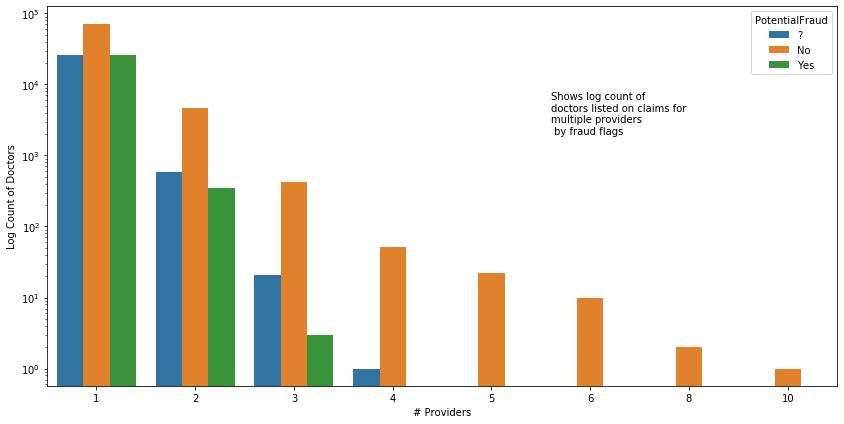

In [79]:
plt.figure(figsize=(12,6))


ax2 = sns.barplot(x = 'Provider',y = 'Doctor', hue = 'PotentialFraud', data = fraudCount)
ax2.set(xlabel='# Providers', ylabel = 'Log Count of Doctors')
plt.tight_layout()
ax2.set(yscale="log")
plt.annotate('Shows log count of \ndoctors listed on claims for \nmultiple providers\n by fraud flags', (4.6, 2000.5))

ax2.figure.savefig("./visualizations/plots/numProviders.png",bbox_inches='tight')

In [ ]:
physNet.groupby('State').count()

In [65]:
beneData = data[['BeneID','Provider','PotentialFraud']]
beneNet = beneData.groupby(['BeneID','PotentialFraud'])['Provider'].nunique().reset_index()

In [144]:
d = data.groupby(['Age','PotentialFraud'])['Provider'].nunique().reset_index()
pivoted = d.pivot_table(values='Provider', index = 'Age', columns='PotentialFraud')
# ax1 = sns.lineplot(x = 'Age', y = 'Provider', hue = 'PotentialFraud', data = d)
# ax1.set(yscale="log")

In [188]:
pivot_scale = (pivoted[['?','No','Yes']] - pivoted.mean(axis=0))/pivoted.std(axis=0)

In [162]:
pivot_scale = pivot_scale.reset_index()

In [166]:
pivot_scale = pivot_scale.melt(id_vars = 'Age')

In [1]:
def plot_count_across_fraud(data, feature, plotType = 'line'):
    d = data.groupby([feature,'PotentialFraud'])['Provider'].nunique().reset_index()
    pivoted = d.pivot_table(values='Provider', index = feature, columns='PotentialFraud')
    pivot_scale = (pivoted[['?','No','Yes']] - pivoted.mean(axis=0))/pivoted.std(axis=0)
    pivot_scale = pivot_scale.reset_index()
    d_scaled = pivot_scale.melt(id_vars = feature)
    
    if plotType == 'line':
        ax1 = sns.lineplot(x = feature, hue = 'PotentialFraud', y = 'value', data=d_scaled)
    elif plotType == 'scatter':
        ax1 = sns.scatterplot(x = feature, hue = 'PotentialFraud', y = 'value', data=d_scaled)
    ax1.set(title='Standardized Number of Providers\n that filed Claims matching this Feature')
    plt.tight_layout()
    return



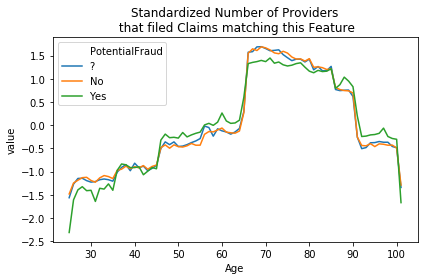

In [245]:
plot_count_across_fraud(data, 'Age')


In [3]:
import numpy as np
import pandas as pd
import scipy.stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../data/combinedData.csv')
target = pd.read_csv('../data/combinedTarget.csv')

data = data.merge(target, how='left',on=['Provider','Set'])
data.drop(columns = ['Unnamed: 0_x','Unnamed: 0_y'], inplace=True)

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,13,14,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
d = data.groupby(['Age','PotentialFraud'])['ClaimID'].count().reset_index()
pivoted = d.pivot_table(values='ClaimID', index = 'Age', columns='PotentialFraud')
pivot_scale = (pivoted[['?','No','Yes']] - pivoted.mean(axis=0))/pivoted.std(axis=0)
pivot_scale = pivot_scale.reset_index()
#d_scaled = pivot_scale.melt(id_vars = 'Age')

In [10]:
pivot_scale

PotentialFraud,Age,?,No,Yes
0,25.0,-0.972209,-0.979695,-0.977751
1,26.0,-0.902064,-0.909747,-0.908285
2,27.0,-0.867547,-0.887019,-0.883936
3,28.0,-0.878682,-0.873339,-0.878923
4,29.0,-0.874228,-0.871573,-0.883219
...,...,...,...,...
72,97.0,-0.550777,-0.555152,-0.531591
73,98.0,-0.547994,-0.552945,-0.536246
74,99.0,-0.573603,-0.556917,-0.546988
75,100.0,-0.587521,-0.587368,-0.589599


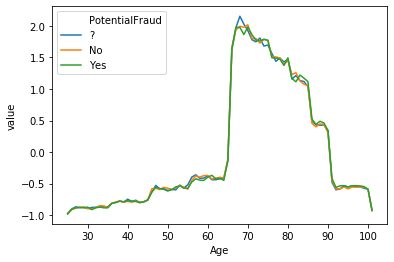

In [8]:

ax1 = sns.lineplot(x = 'Age', hue = 'PotentialFraud', y = 'value', data=d_scaled)

#ax1.set(xlabel='# Providers', ylabel='Log Count of Patients')

#plt.annotate('Shows log count of patients that are on claims filed at \nmultiple providers by fraud flags', (8.6, 10005))

#plt.tight_layout()
#ax1.figure.savefig("./visualizations/plots/multiProvider-Bene.png",bbox_inches='tight')

In [90]:
data.groupby(['Status','WhetherDead'])['BeneID'].count().reset_index()

,Status,WhetherDead,BeneID
0,in,0,49646
1,in,1,379
2,out,0,638786
3,out,1,4792


In [92]:
print(379/(379+49646))
print(4792/(4792+638786))


0.007576211894052973
0.007445872916724935


In [96]:
data.groupby(['Status','PotentialFraud'])['ClaimID'].count().reset_index().head(20)

,Status,PotentialFraud,ClaimID
0,in,?,9551
1,in,No,17072
2,in,Yes,23402
3,out,?,125841
4,out,No,328343
5,out,Yes,189394


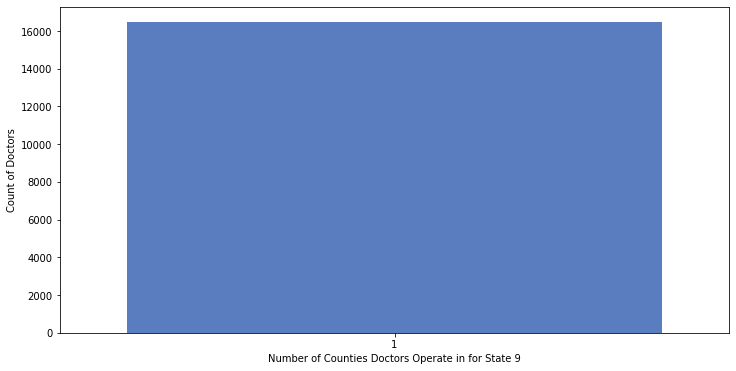

In [5]:
physData = data[['AttendingPhysician','OperatingPhysician','OtherPhysician','State','County']]
physMelt = physData.melt(id_vars=['State','County'],var_name='Type', value_name='Doctor').dropna(axis=0)
physNet = physMelt.groupby(['Doctor','State'])['County'].nunique().reset_index()

plt.figure(figsize=(12,6))

for state in physNet.State.unique():
    filename = "./visualizations/plots/crossing_county/Doctors/State_" + str(state) + ".png"
    ax1 = sns.countplot(x = 'County', data=physNet[physNet.State==state], palette = 'muted');
    ax1.set(xlabel='Number of Counties Doctors Operate in for State ' + str(state), 
            ylabel='Count of Doctors');
    ax1.figure.savefig(filename,bbox_inches='tight')

In [ ]:
beneData = data[['BeneID','Provider','State','County']]
beneNet = beneData.groupby(['BeneID','Provider'])['County'].nunique().reset_index()

plt.figure(figsize=(12,6))


ax1 = sns.countplot(x = 'County', data=beneNet, palette = 'muted')

ax1.set(xlabel='Number of Counties', ylabel='Number of Doctors')

#ax1.figure.savefig("./visualizations/plots/multistateDoctors.png",bbox_inches='tight')

In [252]:
target.copy(deep=True)

,Unnamed: 0,PotentialFraud,Provider,Set
0,0,No,PRV51001,Train
1,1,Yes,PRV51003,Train
2,2,No,PRV51004,Train
3,3,Yes,PRV51005,Train
4,4,No,PRV51007,Train
...,...,...,...,...
6758,6758,?,PRV57713,Test
6759,6759,?,PRV57726,Test
6760,6760,?,PRV57745,Test
6761,6761,?,PRV57749,Test


In [248]:
data.groupby('Provider')['State'].nunique().to_dict()

{'PRV51001': 1,
 'PRV51002': 4,
 'PRV51003': 3,
 'PRV51004': 9,
 'PRV51005': 4,
 'PRV51006': 2,
 'PRV51007': 2,
 'PRV51008': 2,
 'PRV51009': 1,
 'PRV51010': 1,
 'PRV51011': 1,
 'PRV51012': 3,
 'PRV51013': 2,
 'PRV51014': 2,
 'PRV51015': 1,
 'PRV51016': 1,
 'PRV51017': 10,
 'PRV51018': 2,
 'PRV51019': 2,
 'PRV51020': 2,
 'PRV51021': 4,
 'PRV51022': 2,
 'PRV51023': 1,
 'PRV51024': 2,
 'PRV51025': 2,
 'PRV51026': 3,
 'PRV51027': 2,
 'PRV51028': 1,
 'PRV51029': 6,
 'PRV51030': 2,
 'PRV51031': 4,
 'PRV51032': 3,
 'PRV51033': 1,
 'PRV51034': 1,
 'PRV51035': 2,
 'PRV51036': 1,
 'PRV51037': 1,
 'PRV51038': 3,
 'PRV51039': 3,
 'PRV51040': 2,
 'PRV51041': 1,
 'PRV51042': 9,
 'PRV51043': 2,
 'PRV51044': 1,
 'PRV51045': 3,
 'PRV51046': 1,
 'PRV51047': 2,
 'PRV51048': 1,
 'PRV51049': 4,
 'PRV51050': 4,
 'PRV51051': 1,
 'PRV51052': 1,
 'PRV51053': 1,
 'PRV51054': 1,
 'PRV51055': 1,
 'PRV51056': 1,
 'PRV51057': 1,
 'PRV51058': 2,
 'PRV51059': 1,
 'PRV51060': 2,
 'PRV51061': 2,
 'PRV51062': 1,
 'PRV51

Text(1000.6, 105, 'Fraud: No')

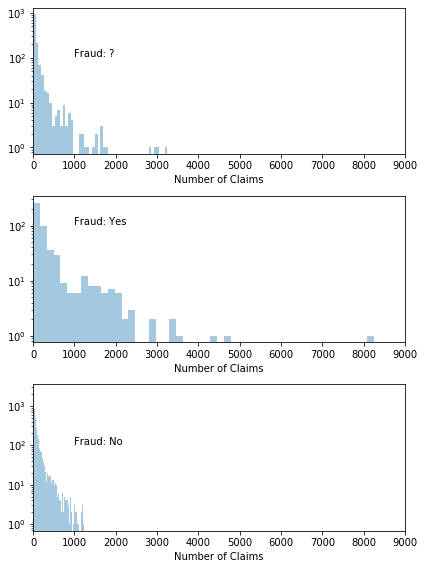

In [126]:
plt.figure(figsize=(6,8))

ax1 = plt.subplot(311)

ax1 = sns.distplot(a = numClaims[numClaims.PotentialFraud=='?']['ClaimID'], kde=False)
ax1.set(yscale="log")
ax1.set(xlabel='Number of Claims')
plt.tight_layout()
plt.xlim(0,9000)
plt.annotate('Fraud: ?', (1000.6, 105))


ax2 = plt.subplot(312)
ax2 = sns.distplot(a = numClaims[numClaims.PotentialFraud=='Yes']['ClaimID'], kde=False)
ax2.set(yscale="log")
ax2.set(xlabel='Number of Claims')
plt.tight_layout()
plt.xlim(0,9000)
plt.annotate('Fraud: Yes', (1000.6, 105))

ax3 = plt.subplot(313)
ax3 = sns.distplot(a = numClaims[numClaims.PotentialFraud=='No']['ClaimID'], kde=False)
ax3.set(yscale="log")
ax3.set(xlabel='Number of Claims')
plt.tight_layout()
plt.xlim(0,9000)
plt.annotate('Fraud: No', (1000.6, 105))

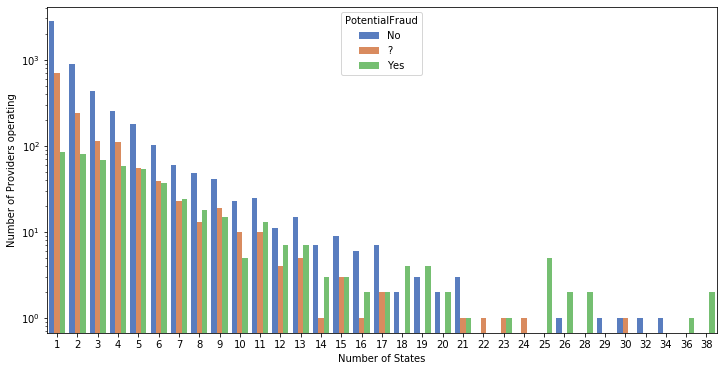

In [15]:
provData = data[['Provider','PotentialFraud','State','County']]
provNet = provData.groupby(['Provider','PotentialFraud'])['State'].nunique().reset_index()

plt.figure(figsize=(12,6))


ax1 = sns.countplot(x = 'State', hue = 'PotentialFraud', data=provNet, palette = 'muted')

ax1.set(xlabel='Number of States', ylabel='Number of Providers operating')
ax1.set(yscale="log")
ax1.figure.savefig("../visualizations/plots/multistateProviders.png",bbox_inches='tight')

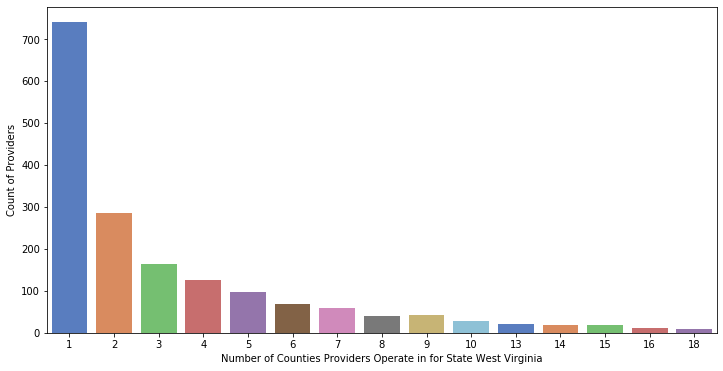

In [57]:
provData = data[['Provider','State','County']]
provNet = provData.groupby(['Provider','State'])['County'].nunique().reset_index().drop_duplicates()

plt.figure(figsize=(12,6))

for state in provNet.State.unique():
    filename = "./visualizations/plots/crossing_county/Providers/State_" + str(state) + ".png"
    ax1 = sns.countplot(x = 'County', data=provNet[provNet.State==state], palette = 'muted');
    ax1.set(xlabel='Number of Counties Providers Operate in for State ' + str(state), 
            ylabel='Count of Providers');
    ax1.figure.savefig(filename,bbox_inches='tight')

In [6]:
physData = data[['AttendingPhysician','OperatingPhysician','OtherPhysician','Provider']]
physMelt = physData.melt(id_vars=['State','County'],var_name='Type', value_name='Doctor').dropna(axis=0)
physNet = physMelt.groupby(['State','County'])['Doctor'].nunique().reset_index()


In [262]:
d = data.melt(id_vars = 'Provider', value_vars = ['AttendingPhysician',
                     'OperatingPhysician',
                     'OtherPhysician'], var_name='Type', value_name='Doctor').dropna(axis=0)
d = d[['Provider','Doctor']].drop_duplicates()

In [268]:
provData['numDocs'] = d.groupby('Provider')['Doctor'].count().values

In [265]:
provData = data.groupby('Provider').agg({'BeneID':'nunique',
                              'ClaimID' : 'count',
                              'State' : 'nunique'}).reset_index()